#I. Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Import CSV files into Colab
import pandas as pd
payment = pd.read_csv('/content/drive/MyDrive/Python_Project2/payment_report.csv', encoding='utf-8')
product = pd.read_csv('/content/drive/MyDrive/Python_Project2/product.csv', encoding='utf-8')
transaction = pd.read_csv('/content/drive/MyDrive/Python_Project2/transactions.csv', encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display the first five rows of the payment dataset
payment.head()

,report_month,payment_group,product_id,source_id,volume
0,2023-01,payment,12,45,624110375
1,2023-01,payment,17,45,335715113
2,2023-01,payment,18,45,737784466
3,2023-01,payment,19,45,120963069
4,2023-01,payment,20,45,319653158


In [ ]:
# Display the first five rows of the product dataset
product.head()

,product_id,category,team_own
0,17,PXXXXXB,ASD
1,18,PXXXXXB,ASD
2,20,PXXXXXB,ASD
3,287,PXXXXXB,ASD
4,372,PXXXXXB,ASD


In [ ]:
# Display the first five rows of the transaction dataset
transaction.head()

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,extra_info,timeStamp
0,3002692434,5,100000,24,1,10199794.0,199794.0,NaN,1682932054455
1,3002692437,305,20000,2,1,14022211.0,14022211.0,NaN,1682932054912
2,3001960110,7255,48605,22,1,NaN,10530940.0,NaN,1682932055000
3,3002680710,2270,1500000,2,1,10059206.0,59206.0,NaN,1682932055622
4,3002680713,2275,90000,2,1,10004711.0,4711.0,NaN,1682932056197


In [ ]:
# Check for missing values
missing_payment = payment.isna().sum()
missing_product = product.isna().sum()
missing_transaction = transaction.isna().sum()

# Print the missing value counts
print("Missing values in payment:", missing_payment)
print("Missing values in product:", missing_product)
print("Missing values in transactions:", missing_transaction)


Missing values in payment: report_month     0
payment_group    0
product_id       0
source_id        0
volume           0
dtype: int64
Missing values in product: product_id    0
category      0
team_own      0
dtype: int64
Missing values in transactions: transaction_id          0
merchant_id             0
volume                  0
transType               0
transStatus             0
sender_id           49059
receiver_id        164795
extra_info        1317907
timeStamp               0
dtype: int64


In [ ]:
# Check for duplicates
duplicate_payment = payment.duplicated().sum()
duplicate_product = product.duplicated().sum()
duplicate_transaction = transaction.duplicated().sum()

# Print results
print("Number of duplicates in payment: ", duplicate_payment)
print("Number of duplicates in product: ", duplicate_product)
print("Number of duplicates in transaction: ", duplicate_transaction)

Number of duplicates in payment:  0
Number of duplicates in product:  0
Number of duplicates in transaction:  28


In [ ]:
# Check info
print(payment.info())
print(product.info())
print(transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   report_month   919 non-null    object
 1   payment_group  919 non-null    object
 2   product_id     919 non-null    int64 
 3   source_id      919 non-null    int64 
 4   volume         919 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  492 non-null    int64 
 1   category    492 non-null    object
 2   team_own    492 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324002 entries, 0 to 1324001
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------         

In [ ]:
print(payment.describe())
print(product.describe())
print(transaction.describe())

         product_id   source_id        volume
count    919.000000  919.000000  9.190000e+02
mean    1192.517954   44.875952  1.978574e+08
std     1293.463329    0.910995  8.367595e+08
min        3.000000   37.000000  5.500000e+03
25%      640.000000   45.000000  1.250000e+06
50%     1059.000000   45.000000  7.982015e+06
75%     1585.000000   45.000000  5.447599e+07
max    15067.000000   45.000000  1.383171e+10
         product_id
count    492.000000
mean     862.886179
std     1015.964776
min        9.000000
25%      270.750000
50%      616.500000
75%     1419.250000
max    15067.000000
       transaction_id   merchant_id        volume     transType   transStatus  \
count    1.324002e+06  1.324002e+06  1.324002e+06  1.324002e+06  1.324002e+06   
mean     3.002233e+09  2.460318e+03  2.388059e+05  6.979222e+00 -1.204625e+01   
std      1.042606e+07  3.304277e+03  9.681009e+05  7.459714e+00  5.577823e+01   
min      3.000000e+09  5.000000e+00  1.000000e+00  2.000000e+00 -1.333000e+03   
2

6. Kiểm tra các giá trị outlier

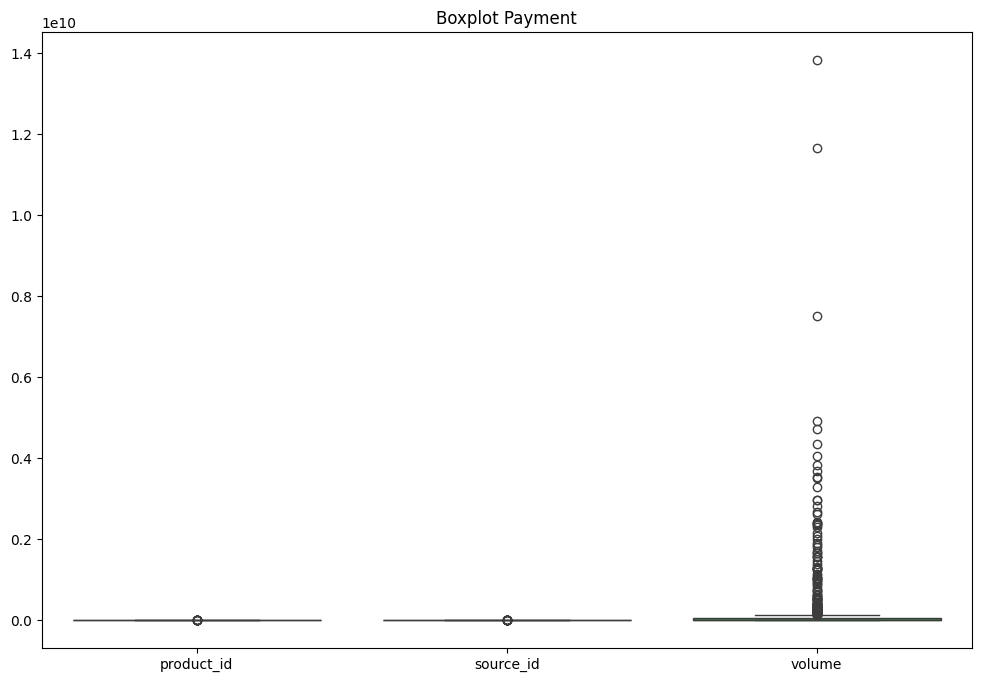

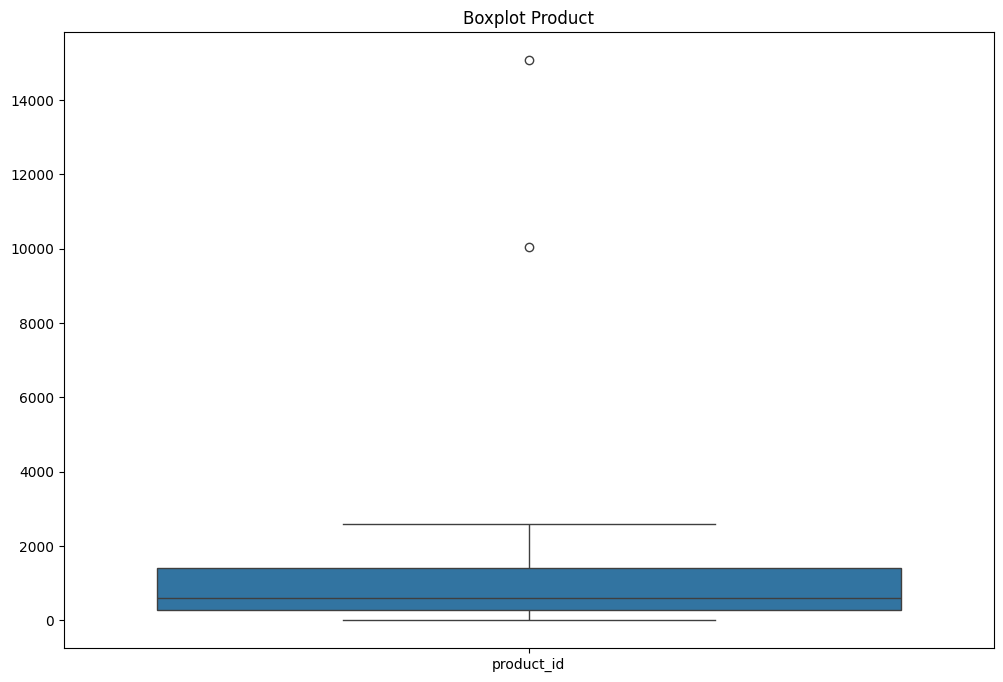

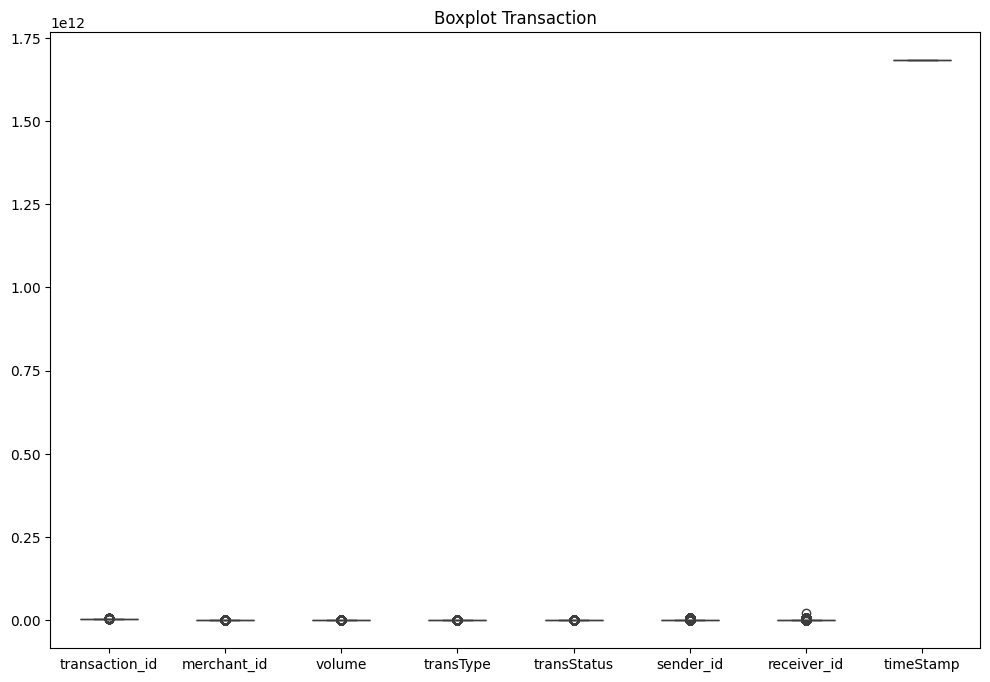

In [ ]:
#Plot boxplot to check outliers for payment
plt.figure(figsize=(12, 8))
sns.boxplot(data=payment)
plt.title("Boxplot Payment")
plt.show()

#Plot boxplot to check outliers for product
plt.figure(figsize=(12, 8))
sns.boxplot(data=product)
plt.title("Boxplot Product")
plt.show()

#Plot boxplot to check outliers for transaction
plt.figure(figsize=(12, 8))
sns.boxplot(data=transaction, width=0.5)
plt.title("Boxplot Transaction")
plt.show()

#II. EDA

**Handle missing value**


In [ ]:
# The sender_id and receiver_id columns in the Transaction table are not important, so missing values are replaced with 'Unknow' for consistency
transaction['sender_id'] = transaction['sender_id'].fillna(value='Unknow')
transaction['receiver_id'] = transaction['receiver_id'].fillna(value='Unknow')

# Drop the 'extra_info' column from the Transaction table
transaction.drop('extra_info', axis=1, inplace=True)

**Drop Duplicate**

In [ ]:
#Drop duplicate
transaction.drop_duplicates(subset=None, keep='first')


,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,timeStamp
0,3002692434,5,100000,24,1,10199794.0,199794.0,1682932054455
1,3002692437,305,20000,2,1,14022211.0,14022211.0,1682932054912
2,3001960110,7255,48605,22,1,Unknow,10530940.0,1682932055000
3,3002680710,2270,1500000,2,1,10059206.0,59206.0,1682932055622
4,3002680713,2275,90000,2,1,10004711.0,4711.0,1682932056197
...,...,...,...,...,...,...,...,...
1323997,3003723030,305,20000,2,1,24524311.0,Unknow,1683035672634
1323998,3003723033,2270,100000,2,1,10277242.0,277242.0,1683035672876
1323999,3003723036,2270,100000,2,1,10144599.0,144599.0,1683035672892
1324000,3003723039,5,400,22,1,10028007.0,21013762.0,1683035672896


**Convert to the correct data type**

In [ ]:
# 1. Convert the report_month column from object to datetime
payment['report_month'] = pd.to_datetime(payment['report_month'], errors='coerce')

# 2. product: Convert 'category' and 'team_own' columns from object to category
product_columns = ['category', 'team_own']
for col in product_columns:
    product[col] = product[col].astype('category')

# 3. transaction: Convert 'sender_id' and 'receiver_id' columns from float64 to int64, and 'timeStamp' from int64 to datetime
transaction_columns_int64 = ['sender_id', 'receiver_id']
for col in transaction_columns_int64:
    transaction[col] = transaction[col].fillna('Unknow').astype(str)

transaction['timeStamp'] = pd.to_datetime(transaction['timeStamp'], errors='coerce')


In [ ]:
# Merge payment & product
payment_product = payment.merge(product, how='left', on ='product_id')
print(payment_product)

    report_month payment_group  product_id  source_id       volume  category  \
0     2023-01-01       payment          12         45    624110375   PXXXXXT   
1     2023-01-01       payment          17         45    335715113   PXXXXXB   
2     2023-01-01       payment          18         45    737784466   PXXXXXB   
3     2023-01-01       payment          19         45    120963069  PXXXXXM2   
4     2023-01-01       payment          20         45    319653158   PXXXXXB   
..           ...           ...         ...        ...          ...       ...   
914   2023-04-01       payment       15067         45      1504000   PXXXXXR   
915   2023-04-01        refund        1976         37   3542271587       NaN   
916   2023-04-01        refund        1976         38  13831708189       NaN   
917   2023-04-01        refund        1976         39   1905435543       NaN   
918   2023-04-01        refund        1976         39   3679922071       NaN   

    team_own  
0        ASD  
1        

In [ ]:
# Lưu dữ liệu mới thành các file csv
payment.to_csv('/content/drive/MyDrive/Python_Project2/payment_report_cleaned.csv', index=False)
product.to_csv('/content/drive/MyDrive/Python_Project2/payment_report_cleaned.csv', index=False)
transaction.to_csv('/content/drive/MyDrive/Python_Project2/payment_report_cleaned.csv', index=False)


#III. Analysis

**Find the top 3 products with the highest revenue**

In [ ]:
# Calculate volume by product_id
volume_by_product = payment_product.groupby('product_id')['volume'].agg('sum').reset_index()

# Sort volume in descending order
volume_by_product.sort_values(by='volume', ascending=False)

# Filter the top 3 product_ids with the highest volume
top_3_productid = volume_by_product.head(3)

# Print the results
print("Top 3 product_ids with the highest volume:")
print(top_3_productid)

Top 3 product_ids with the highest volume:
   product_id      volume
0           3        6000
1          12  1934440830
2          15  4206315258


**Verify whether each product is managed by only one team**

In [ ]:
# Group by product_id and count the number of unique team_own values
products_by_teamown = payment_product.groupby('product_id')['team_own'].nunique()

# Identify product_id entries managed by more than one team
abnormal_products = products_by_teamown[products_by_teamown > 1]

# Print the results
if abnormal_products.empty:
  print('No abnormal products')
else:
  print('There are abnormal products:')
  print(abnormal_products)

No abnormal products


 **Find the team has had the lowest performance (lowest volume) since Q2.2023. Find the category that contributes the least to that team**

In [ ]:
# 1. Find the team with the lowest performance (lowest volume) since Q2.2023

# Filter data from Q2.2023 onwards
payment_product_Q2 = payment_product[payment_product['report_month'] >= '2023-04-01']

# Calculate the total volume for each team in Q2.2023
volume_by_team = payment_product_Q2.groupby('team_own', observed=False)['volume'].agg('sum').reset_index()

# Sort teams by volume in ascending order
volume_by_team.sort_values(by='volume', ascending=True)

# Get the team with the lowest volume
lowest_team_name = volume_by_team.loc[volume_by_team['volume'] == volume_by_team['volume'].min(), 'team_own'].iloc[0]
lowest_volume = volume_by_team.loc[volume_by_team['volume'] == volume_by_team['volume'].min(), 'volume'].iloc[0]

# Print the result
print(f"The lowest performance team in Q2.2023 is {lowest_team_name} with volume = {lowest_volume}")

# 2. Find the category that contributes the least to the lowest-performing team

# Filter data for the lowest-performing team (APS) in Q2
volume_lowest_team_Q2 = payment_product_Q2[payment_product_Q2['team_own'] == 'APS']

# Calculate total volume by category for the lowest-performing team
vol_by_cat_APS = volume_lowest_team_Q2.groupby('category', observed=False)['volume'].agg('sum').reset_index()

# Sort categories by volume in ascending order
vol_by_cat_APS.sort_values(by='category', ascending=True)

# Get the category with the lowest volume contribution
lowest_cat = vol_by_cat_APS.loc[vol_by_cat_APS['volume'] == vol_by_cat_APS['volume'].min(), 'category'].iloc[0]
lowest_vol = vol_by_cat_APS.loc[vol_by_cat_APS['volume'] == vol_by_cat_APS['volume'].min(), 'volume'].iloc[0]

# Print the result
print(f"The lowest contributing category to the team APS is {lowest_cat} with volume = {lowest_vol}")


The lowest performance team in Q2.2023 is APS with volume = 51141753
The lowest contributing category to the team APS is PXXXXXB with volume = 0


**Find the contribution of source_ids of refund transactions (payment_group = ‘refund’), what is the source_id with the highest contribution?**

In [ ]:
# Filter transactions that are refunds
refund = payment_product[payment_product['payment_group'] == 'refund']

# Calculate total volume by each source_id
volume_by_id = refund.groupby('source_id')['volume'].agg('sum').reset_index()

# Calculate the percentage contribution of each source_id
volume_by_id['%_contribute'] = volume_by_id['volume'] / volume_by_id['volume'].sum() * 100

# Print the result
print(volume_by_id)

# Sort contributions in descending order
volume_by_id.sort_values(by='%_contribute', ascending=False)

# Get the source_id with the highest contribution
source_id = volume_by_id.loc[volume_by_id['volume'] == volume_by_id['volume'].max(), 'source_id'].iloc[0]
contribute = volume_by_id.loc[volume_by_id['volume'] == volume_by_id['volume'].max(), '%_contribute'].iloc[0]

print(f"{source_id} is the highest contributor to refund transactions with {contribute}%")

   source_id       volume  %_contribute
0         37   9151069226     14.808134
1         38  36527454759     59.108225
2         39  16119059662     26.083641
38 is the highest contributor to refund transactions with 59.10822495528634%


**5. Using transactions.csv
Define type of transactions (‘transaction_type’) for each row, given:
- transType = 2 & merchant_id = 1205: Bank Transfer Transaction
- transType = 2 & merchant_id = 2260: Withdraw Money Transaction
- transType = 2 & merchant_id = 2270: Top Up Money Transaction
- transType = 2 & others merchant_id: Payment Transaction
- transType = 8, merchant_id = 2250: Transfer Money Transaction
- transType = 8 & others merchant_id: Split Bill Transaction
- Remained cases are invalid transactions**


In [ ]:
# Define conditions for transaction types
condition = [
    (transaction['transType'] == 2) & (transaction['merchant_id'] == 1205),  # Bank Transfer Transaction
    (transaction['transType'] == 2) & (transaction['merchant_id'] == 2260),  # Withdraw Money Transaction
    (transaction['transType'] == 2) & (transaction['merchant_id'] == 2270),  # Top Up Money Transaction
    (transaction['transType'] == 2) & (~transaction['merchant_id'].isin([2270, 2260, 1205])),  # Payment Transaction
    (transaction['transType'] == 8) & (transaction['merchant_id'] == 2250),  # Transfer Money Transaction
    (transaction['transType'] == 8) & (transaction['merchant_id'] != 2250),  # Split Bill Transaction
]

# Define the corresponding transaction types
type_of_transactions = [
    'Bank Transfer Transaction',
    'Withdraw Money Transaction',
    'Top Up Money Transaction',
    'Payment Transaction',
    'Transfer Money Transaction',
    'Split Bill Transaction'
]

# Assign transaction types based on conditions
transaction['transaction_type'] = np.select(condition, type_of_transactions, default='Invalid Transaction')


**Of each transaction type (excluding invalid transactions): find the number of transactions, volume, senders and receivers.**

In [ ]:
valid_transaction = transaction[transaction['transaction_type'] != 'Invalid Transaction']

# Group by transaction type and aggregate the required metrics
final = valid_transaction.groupby('transaction_type').agg(
    num_trans = ('transaction_id', 'count'),  # Count of transactions
    num_volume = ('volume', 'sum'),  # Sum of volumes
    num_sender = ('sender_id', 'nunique'),  # Count of unique senders
    num_receiver = ('receiver_id', 'nunique')  # Count of unique receivers
).reset_index()

# Print the final result
print(final)

             transaction_type  num_trans    num_volume  num_sender  \
0   Bank Transfer Transaction      37879   50605806190       23156   
1         Payment Transaction     398677   71851515181      139583   
2      Split Bill Transaction       1376       4901464        1323   
3    Top Up Money Transaction     290502  108606478829      110409   
4  Transfer Money Transaction     341177   37033171492       39021   
5  Withdraw Money Transaction      33725   23418181420       24814   

   num_receiver  
0          9272  
1        113299  
2           572  
3        110409  
4         34585  
5         24814  
